<a href="https://colab.research.google.com/github/Zaxis018/AI/blob/main/RNNs/Simple_RNN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydot
!pip install graphviz
!pip install netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [2]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN
from keras.utils import plot_model

In [3]:
model=Sequential()
model.add(SimpleRNN(3,input_shape=(4,5))) # first RNN hidden layer
#          3 hidden rnn neurons    4 max allowed time steps( i.e maximum inputs allowed eg, words=4) , 5 = input vector shape
#model.add(SimpleRNN(4))  # Second RNN hidden layer
model.add(Dense(1, activation='sigmoid'))  # Dense output layer

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 27        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


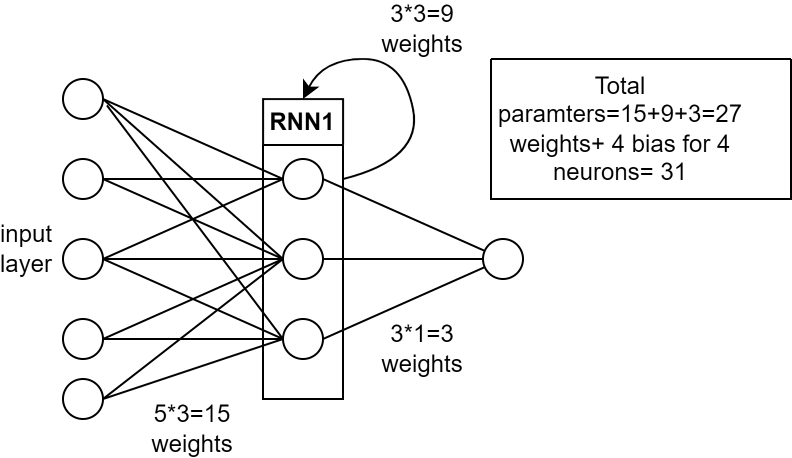

Alternatively the network can be drawn as

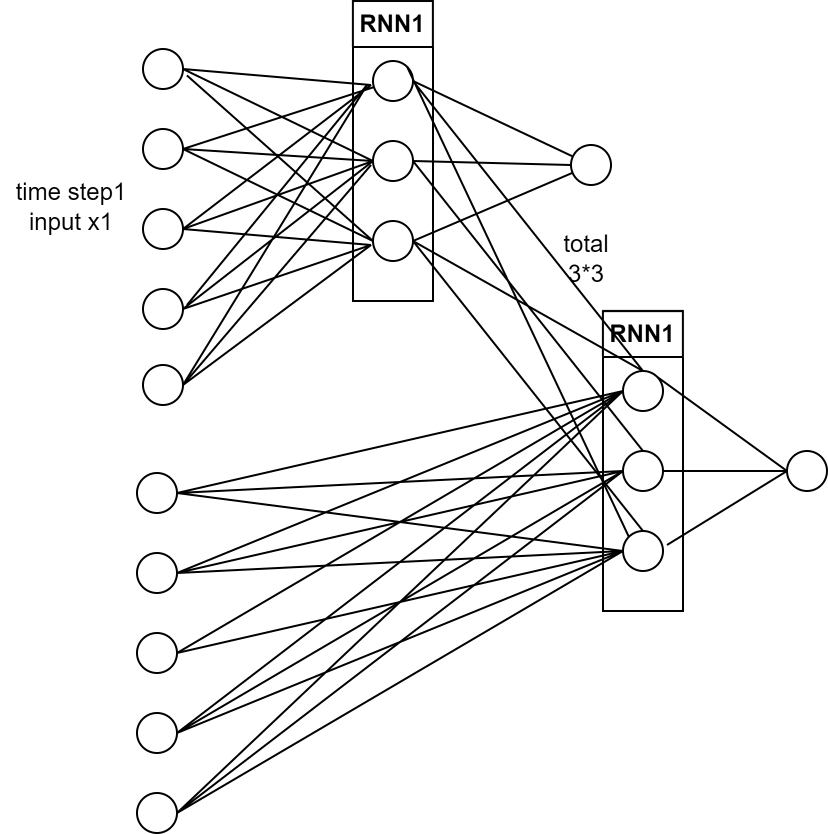

In [4]:
model1 = Sequential()
model1.add(SimpleRNN(3, input_shape=(4, 5), return_sequences=True))  # First RNN hidden layer

#  return_sequences=True means the output from hidden layer is outputted to next layer at each step.(used for generation or named entity recognition)
# return_sequences=False means only last output is used .(useful for sentiment analysis)

model1.add(SimpleRNN(4, return_sequences=True))  # Second RNN hidden layer
model1.add(Dense(1, activation='sigmoid'))  # Dense output layer
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4, 3)              27        
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 4, 4)              32        
                                                                 
 dense_1 (Dense)             (None, 4, 1)              5         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


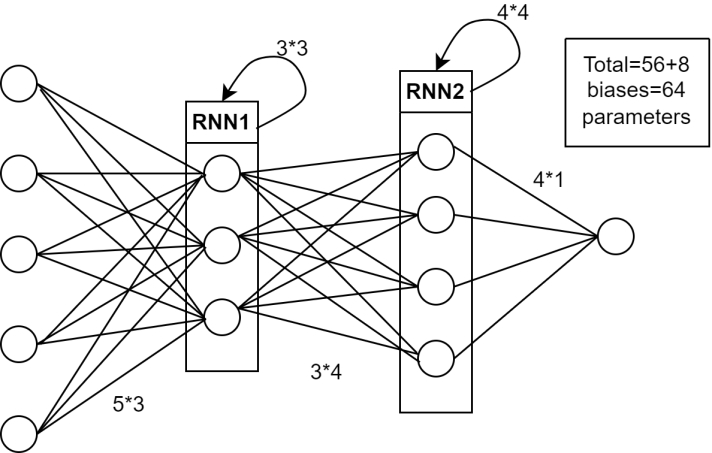

##Movie review sentiment analysis with simple RNN model and integer encoding

Demo of integer encoding

In [5]:
import numpy as np

docs = ['Hello ',
		'Nepal',
		'balance ko hooting',
		'is the person be good no matter who gave it',
		'chineko ta xaina , hai',
		'nalis ',
		'baghchal is better than checkers',
		'de facto de jure']

In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<unknown>')

In [7]:
tokenizer.fit_on_texts(docs)

In [8]:
tokenizer.word_index

{'<unknown>': 1,
 'is': 2,
 'de': 3,
 'hello': 4,
 'nepal': 5,
 'balance': 6,
 'ko': 7,
 'hooting': 8,
 'the': 9,
 'person': 10,
 'be': 11,
 'good': 12,
 'no': 13,
 'matter': 14,
 'who': 15,
 'gave': 16,
 'it': 17,
 'chineko': 18,
 'ta': 19,
 'xaina': 20,
 'hai': 21,
 'nalis': 22,
 'baghchal': 23,
 'better': 24,
 'than': 25,
 'checkers': 26,
 'facto': 27,
 'jure': 28}

In [9]:
tokenizer.word_counts

OrderedDict([('hello', 1),
             ('nepal', 1),
             ('balance', 1),
             ('ko', 1),
             ('hooting', 1),
             ('is', 2),
             ('the', 1),
             ('person', 1),
             ('be', 1),
             ('good', 1),
             ('no', 1),
             ('matter', 1),
             ('who', 1),
             ('gave', 1),
             ('it', 1),
             ('chineko', 1),
             ('ta', 1),
             ('xaina', 1),
             ('hai', 1),
             ('nalis', 1),
             ('baghchal', 1),
             ('better', 1),
             ('than', 1),
             ('checkers', 1),
             ('de', 2),
             ('facto', 1),
             ('jure', 1)])

In [10]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[4],
 [5],
 [6, 7, 8],
 [2, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [18, 19, 20, 21],
 [22],
 [23, 2, 24, 25, 26],
 [3, 27, 3, 28]]

In [11]:
from keras.datasets import imdb
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 2s 0us/step


In [12]:
print(len(X_train[1]),len(X_train[2]),len(X_train[3]),len(X_train[4]),len(X_train[5]))
print()
print(X_train[1])
print(X_train.shape)

189 141 550 147 43

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
(25000,)


In [13]:
print(y_train[0],y_train[1],y_train[2],y_train[3])
#0=negative, 1=positive

1 0 0 1


In [14]:
#the training data is all numbers. to interpret the dataset , revert back or detokenize .

from keras.preprocessing import sequence

# Retrieve the word index mapping
word_index = imdb.get_word_index()

# Reverse the word index mapping and shift it by 3 positions
reverse_word_index = dict([(value + 3, key) for (key, value) in word_index.items()])
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

# Decode a review from integer sequence to text
def decode_review(sequence):
    decoded_words = [reverse_word_index.get(word, "<UNK>") for word in sequence]
    return ' '.join(decoded_words)

# Decode the first review in the training set
decoded_review = decode_review(X_train[3])
print(decoded_review)


1641221/1641221 [==============================] - 1s 1us/step
<START> the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of culloden she makes the characters come alive her passion is that of an eye witness one to the events on the sodden heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and breadth of scotland as i discussed it with a friend one night in mallaig a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional reservoir fact and fiction blend with aspiration role

In [15]:
from keras.utils import pad_sequences
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)
# padding is necessary only  for faster training, RNN can take any inputs as they are taken at different time steps and the network is same.

In [16]:
model_rnn = Sequential()

model_rnn.add(SimpleRNN(32,input_shape=(None,1),return_sequences=False))# only 1 input integer at a time
model_rnn.add(Dense(1,activation='sigmoid'))

model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_rnn.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Epoch 1/3
782/782 [==============================] - 40s 41ms/step - loss: 0.7035 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5006
Epoch 2/3
782/782 [==============================] - 33s 42ms/step - loss: 0.6934 - accuracy: 0.5068 - val_loss: 0.6935 - val_accuracy: 0.5052
Epoch 3/3
782/782 [==============================] - 28s 36ms/step - loss: 0.6933 - accuracy: 0.5061 - val_loss: 0.6955 - val_accuracy: 0.5036


As expected bad results , next we use word embeddings where each word is represented by a embedding vector instead of a single integer.

*The embedding vectors can be imported from word2vec/glob or can also be learned during training. the learned vectors will only be good for this certain tasks while word2vec vectors can be used anywhere , meaning they really capture word meaning well.*

In [18]:
# let us repeat the same process
import numpy as np

docs_new = ['Hello',
		'Nepal',
		'balance ko hooting',
		'is the person be good no matter who gave it',
		'chineko ta xaina , hai',
		'nalis ',
		'baghchal is better than checkers',
		'de facto de jure']

In [19]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<unknown>')

In [20]:
tokenizer.fit_on_texts(docs_new)

In [21]:
sequences_new = tokenizer.texts_to_sequences(docs_new)
sequences_new

[[4],
 [5],
 [6, 7, 8],
 [2, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [18, 19, 20, 21],
 [22],
 [23, 2, 24, 25, 26],
 [3, 27, 3, 28]]

In [22]:
from keras.utils import pad_sequences
sequences_new = pad_sequences(sequences,padding='post')
sequences_new

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  7,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21,  0,  0,  0,  0,  0,  0],
       [22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [23,  2, 24, 25, 26,  0,  0,  0,  0,  0],
       [ 3, 27,  3, 28,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [23]:
#model to learn embedding
from keras.layers import SimpleRNN,Dense,Embedding,Flatten
model_embedding = Sequential()
model_embedding.add(Embedding(33,output_dim=3,input_length=10))
#        33= total words in vocabulary  |  3 = dimensions vector for each token(our choice)  |  10= length of max sequence

model_embedding.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 3)             99        
                                                                 
Total params: 99 (396.00 Byte)
Trainable params: 99 (396.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The embedding neural network is also a NN with max allowed input=(input_length=10) and input layer has 33 neuros(total words in vocabulary) each word/token is one hot encoded in 33 dimensions and output of embedding NN has ,(output_dim=3:) neurons which result in embedding vectors

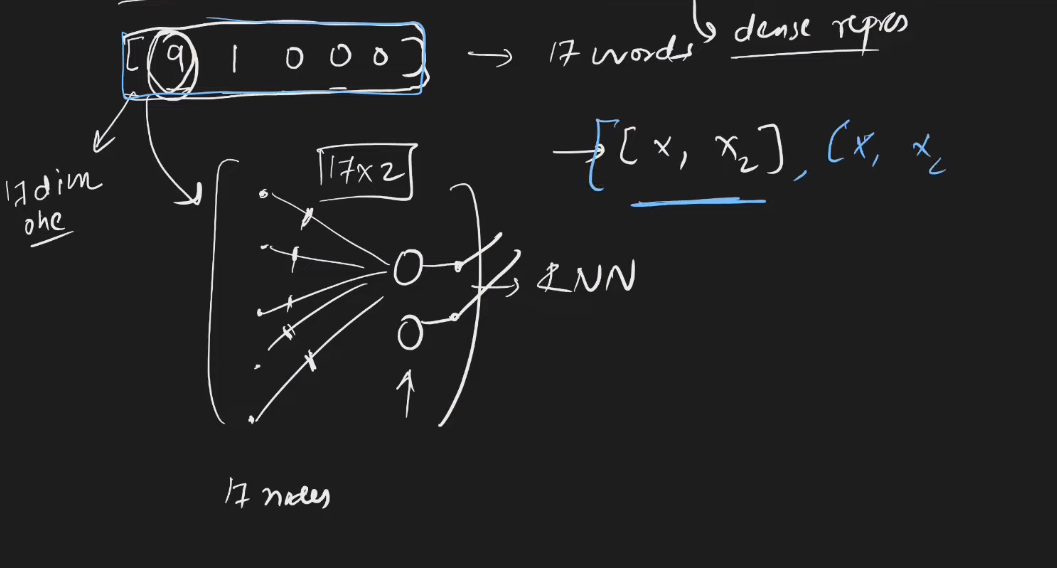

In [24]:
model_embedding.compile('adam','accuracy')

In [25]:
pred = model_embedding.predict(sequences_new)
print(pred)

1/1 [==============================] - 0s 93ms/step
[[[ 0.00684907  0.00658761  0.02534273]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]]

 [[-0.03836042 -0.01555358  0.0477903 ]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]
  [-0.01706224  0.00521164  0.04001638]]

 [[ 0.02768255 -0.02858361  0.04705067]
  [ 0.01082594 -0.04163948  0.04295573]
  [ 0.04746084 -0.04674144 -0.04456571]
  [-0.01706224  0.005211

the above embeddings are based on random initial weights. to get good embeddings we must actually train the model

In [26]:
# now let us train model with added embedding layer
model_imdb= Sequential()
model_imdb.add(Embedding(10000,output_dim=3,input_length=50))
# for imbd dataset set vocabulary size=10000, embedding vector size =3 and max length of input =50 words/tokens

model_imdb.add(SimpleRNN(32,return_sequences=False))
model_imdb.add(Dense(1, activation='sigmoid'))

model_imdb.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 3)             30000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1152      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31185 (121.82 KB)
Trainable params: 31185 (121.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


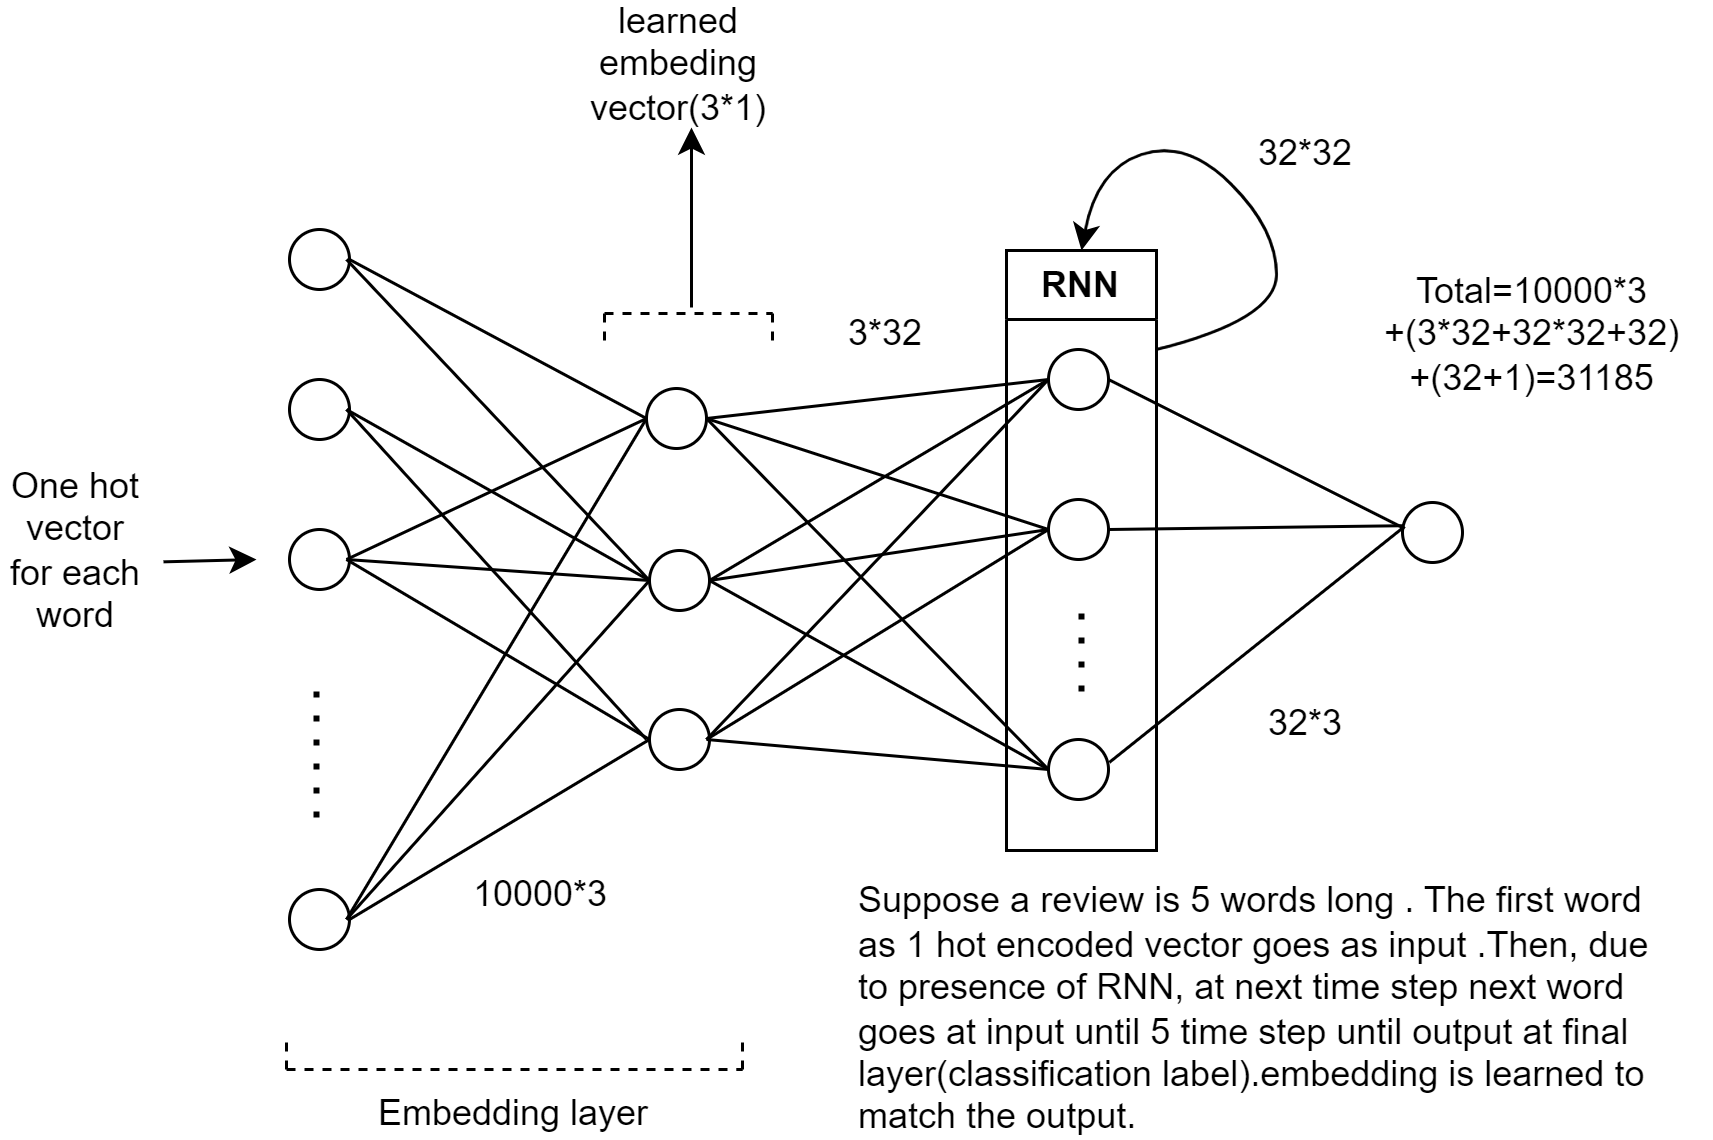

In [27]:
model_imdb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model_imdb.fit(X_train, y_train,epochs=3,validation_data=(X_test,y_test))

Epoch 1/3
782/782 [==============================] - 65s 81ms/step - loss: 0.6557 - acc: 0.5783 - val_loss: 0.5470 - val_acc: 0.7146
Epoch 2/3
782/782 [==============================] - 45s 58ms/step - loss: 0.4159 - acc: 0.8147 - val_loss: 0.4291 - val_acc: 0.8047
Epoch 3/3
782/782 [==============================] - 44s 56ms/step - loss: 0.3118 - acc: 0.8712 - val_loss: 0.4351 - val_acc: 0.8078


Now lets make predictions with our own new data

In [28]:
def get_prediction(text):
  # Retrieve the word index mapping
  word_index = imdb.get_word_index()

  # Create the tokenizer with the same word index mapping
  tokenizer1 = Tokenizer(num_words=len(word_index))
  tokenizer1.word_index = word_index

  # Preprocess and encode a new text

  preprocessed_text = text.lower()  # Convert to lowercase
  preprocessed_text = preprocessed_text.replace(".", "")  # Remove punctuation
  words = preprocessed_text.split()  # Split into individual words
  encoded_sequence = [word_index.get(word, 0) + 3 for word in text.lower().replace(".", "").split()]
  # Pad the sequence to a fixed length (if necessary)
  max_sequence_length = 50 # Example maximum sequence length
  padded_sequence = sequence.pad_sequences([encoded_sequence], maxlen=max_sequence_length,padding='post')

  result=model_imdb.predict(padded_sequence)
  if result[0][0]>0.5:
    return "positve sentiment"
  else:
    return "Negative sentiment"

In [29]:
def get_prediction1(text):
  # Retrieve the word index mapping
  word_index = imdb.get_word_index()

  # Create the tokenizer with the same word index mapping
  tokenizer1 = Tokenizer(num_words=len(word_index))
  tokenizer1.word_index = word_index

  # Preprocess and encode a new text

  preprocessed_text = text.lower()  # Convert to lowercase
  preprocessed_text = preprocessed_text.replace(".", "")  # Remove punctuation
  words = preprocessed_text.split()  # Split into individual words
  encoded_sequence = [word_index.get(word, 0) + 3 for word in text.lower().replace(".", "").split()]
  # Pad the sequence to a fixed length (if necessary)
  max_sequence_length = 50 # Example maximum sequence length
  padded_sequence = sequence.pad_sequences([encoded_sequence], maxlen=max_sequence_length,padding='post')

  result=model_imdb.predict(padded_sequence)
  return result


In [30]:
our_text="what a load of crap."
a=get_prediction(our_text)
a

1/1 [==============================] - 0s 127ms/step


'Negative sentiment'